**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial
Prof. Cedric Luiz de Carvalho

Aluna(o): 



---



# Resolução de problemas por meio de busca
## Buscas não informadas (cegas)

- **Busca em largura**: A raiz é expandida; todos os nós gerados pela expansão da raiz são expandidos; os sucessores dos nós gerados pela expansão da raiz são expandidos; o processo se repete até que a meta seja atingida.
- **Busca de custo uniforme**: a busca em Largura pode ser modificada, expandindo-se sempre o nó de menor custo da fronteira ao invés nó de menor profundidade.
- **Busca em profundidade**: expande sempre um dos nós de maior profundidade na árvore. Quando a busca encontra um nó que não pode ser expandido, retorna e expande os nós que estão pendentes.
- **Busca em profundidade limitada**: a busca em profundidade é modificada, impondo-se um limite máximo na profundidade.
- **Busca em aprofundamento iterativo**: é feita uma busca em profundidade limitada, incrementando-se sucessivamente o limite máximo da busca.

**Modelo:**

   * Descrição matemática abstrata

**Um problema:**



*   Estado inicial
*   Ações possíveis
*   Modelo de transição (determinação dos sucessores)
*   Teste da meta
*   Função de custo do caminho




**Abstração:**

      * Desconsiderar o que não seja relevante para o problema do mundo real

**Algoritmos de Busca (Ben Coppin)**:

In [0]:
Function depth ()
{
    queue = []; // initialize an empty queue
    state = root_node; // initialize the start state
    while (true)
      {
        if is_goal (state)
          then return SUCCESS
        else add_to_front_of_queue (successors (state));
        if queue == []
          then report FAILURE;
        state = queue [0]; // state = first item in queue
        remove_first_item_from (queue);
      }
}

In [0]:
Function recursive_depth (state)
{
  if is_goal (state)
    then return SUCCESS
  else
  {
    remove_from_stack (state);
    add_to_stack (successors (state))
  }
  while (stack != [])
  {
    if recursive_depth (stack [0]) == SUCCESS
      then return SUCCESS;
    remove_first_item_from (stack);
  }
  return FAILURE;
}

In [0]:
Function breadth ()
{
  queue = []; // initialize an empty queue
  state = root_node; // initialize the start state
  while (true)
  {
    if is_goal (state)
        then return SUCCESS
    else add_to_back_of_queue (successors (state));
    if queue == []
       then report FAILURE;
    state = queue [0]; // state = first item in queue
    remove_first_item_from (queue);
  }
}

## Exemplos de problemas (Russel & Norvig)

### Problema de roteamento

*   Considere que um turista esteja viajando para a Romênia. Ao chegar lá, deseja se deslocar de uma cidade a outra pelo melhor trajeto possível. O turista tem a sua disposição o mapa dado a seguir que mostra as conexões entre as cidades e a distância entre elas. 

<img src="http://robotics.cs.tamu.edu/dshell/cs625/images/map.jpg" height="366" width="603">

* O espaço de estados pode ser representado por um grafo, onde os vértices são os estados do problema (as cidades, neste caso) e as arestas são as ações (neste caso, dirigir pelas estradas).

* Representaremos as cidades pela letra inicial do seu nome. O grafo será representado por uma estrutura **dict** que mapeia cada cidade e seus vizinhos diretos (aqueles ligados diretamente à cidade por uma estrada).

In [0]:
romênia = {
 'A': ['Z', 'T', 'S'],
 'B': ['F', 'P', 'G', 'U'],
 'C': ['D', 'R', 'P'],
 'D': ['M', 'C'],
 'E': ['H'],
 'F': ['S', 'B'],
 'G': ['B'],
 'H': ['U', 'E'],
 'I': ['N', 'V'],
 'L': ['T', 'M'],
 'M': ['L', 'D'],
 'N': ['I'],
 'O': ['Z', 'S'],
 'P': ['R', 'C', 'B'],
 'R': ['S', 'C', 'P'],
 'S': ['A', 'O', 'F', 'R'],
 'T': ['A', 'L'],
 'U': ['B', 'V', 'H'],
 'V': ['U', 'I'],
 'Z': ['O', 'A']}

* Se o turista desejar se deslocar de A para B, deverá considerar os possíveis caminhos a partir de A:

In [2]:
romênia['A']

['Z', 'T', 'S']

 **Qual escolher?**

* Um dos nós da **fronteira**

### Busca em largura

In [0]:
from collections import deque # Doubly-ended queue: pop from left, append to right.

def breadth_first(start, goal, neighbors):
    "Find a shortest sequence of states from start to the goal."
    frontier = deque([start]) # A queue of states
    previous = {start: None}  # start has no previous state; other states will
    while frontier:
        s = frontier.popleft()
        if s == goal:
            return path(previous, s)
        for s2 in neighbors[s]:
            if s2 not in previous:
                frontier.append(s2)
                previous[s2] = s
                
def path(previous, s): 
    "Return a list of states that lead to state s, according to the previous dict."
    return [] if (s is None) else path(previous, previous[s]) + [s]

* **Exemplos:**

In [7]:
breadth_first('A', 'B', romênia)

['A', 'S', 'F', 'B']

In [8]:
breadth_first('L', 'N', romênia)

['L', 'T', 'A', 'S', 'F', 'B', 'U', 'V', 'I', 'N']

In [9]:
breadth_first('N', 'L', romênia)

['N', 'I', 'V', 'U', 'B', 'F', 'S', 'A', 'T', 'L']

In [10]:
breadth_first('E', 'E', romênia)

['E']

### Problema da escada de palavras

* Dada uma palavra, transformá-la em uma outra trocando apenas uma letra a cada passo. Por exemplo, para transformar 
**'dizes'** em **'chapa'** precisamos de **11** passos:

'dizes' ->  'dites' ->  'dates' ->  'danes' ->  'danos' ->  'canos' ->  'canoa' ->  'canta' ->
 'cauta' ->  'chuta' ->  'chupa' ->  'chapa' 


Podemos obter uma lista das palavras de 5 letras da Língua Portuguesa. Por exemplo, através do portal: https://www.palavras.net/
  
  
 * Antes de iniciar os testes, carregar os arquivos python a seguir para a máquina virtual: util.py e search.py
  
  

In [18]:
from google.colab import files # carregar o arquivo  'palavras.txt'
uploaded = files.upload()

Saving utils.py to utils.py


In [19]:
!ls    # checar se o arquivo foi devidamente carregado

aima-data  sample_data	search.py  utils.py


In [0]:
!mkdir aima-data/

In [0]:
!mv palavras.txt aima-data/

In [15]:
!ls aima-data/

palavras.txt


In [0]:
from search import *
sgb_words = open_data("palavras.txt") #https://www.palavras.net/

* Podemos associar as palavras neste aquivo à variável PALAVRAS:

In [21]:
PALAVRAS = set(sgb_words.read().split())
len(PALAVRAS)

2000

* Podemos definir uma função que retorna as palavras que diferem apenas uma letra da palavra dada:

In [0]:
def vizinhas(word):
    "All words that are one letter away from this word."
    pal_vizinhas = {word[:i] + c + word[i+1:]
                 for i in range(len(word))
                 for c in 'abcdefghijklmnopqrstuvwxyz'
                 if c != word[i]}
    return pal_vizinhas & PALAVRAS

* Exemplos:

In [23]:
vizinhas('dizes')

{'dites', 'dizei', 'dizem', 'dizer'}

In [24]:
vizinhas('abafo')

{'abafa', 'abafe', 'abalo', 'abano', 'abato'}

In [25]:
vizinhas('átrio')

set()

* Agora, podemos criar um dicionário para acomodar as vizinhas: {palavra: {vizinha, ...}}:

In [0]:
palavras_vizinhas = {word: vizinhas(word)
                  for word in PALAVRAS}

* Agora podemos usar a **busca em largura** para resolver o problema em questão:

In [27]:
breadth_first('abafo', 'dobro', palavras_vizinhas )

['abafo',
 'abafa',
 'abana',
 'afana',
 'afaga',
 'apaga',
 'apara',
 'arara',
 'arava',
 'crava',
 'coava',
 'doava',
 'doara',
 'dobra',
 'dobro']

In [0]:
breadth_first('dizes', 'chapa', palavras_vizinhas )

# Atividade Prática

* Deseja-se identificar a melhor rota para uma viagem rodoviária pelas capitais brasileiras. Para isso pode-se utilizar os dados obtidos do portal: [Itatrans](http://www.itatrans.com.br/distancia.html) e armazenados no arquivo **capitais.csv.**

* A porção inferior da planilha (células abaixo daquela com valor 0), traz à distância rodoviária entre as cidades. A porção superior, indica as distâncias aéreas entre as cidades.

* Considere que o mapa a seguir indique as conexões rodoviárias entre as capitais.  As conexões diretas entre as cidades estão indicadas no arquivo **conexCapitais.csv**

In [0]:
!mkdir img/

In [0]:
!mv mapa-brasil-estados-capitais.jpg img/

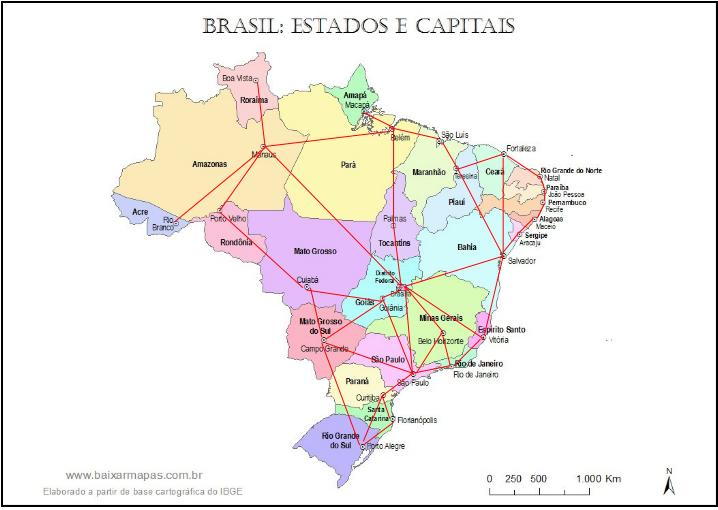

In [4]:
from IPython.display import Image
Image("img/mapa-brasil-estados-capitais.jpg")

*  Defina um modelo para este problema.
*  Construa uma implementação computacional para a solução do problema, utilizando as seguintes estratégias:

     1.   Busca em largura
     2.   Busca em profundidade
     3.   Busca em profundidade limitada
     4.   Busca em aprofundamento iterativo
     5.   Busca de custo uniforme (considerar a distância rodoviária entre as cidades como o custo do caminho entre elas)
     
* Para cada estratégia implementada, meça o tempo gasto para encontrar a solução e o espaço de armazenamento utilizado (número de nós gerados).


